In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Load Dataset

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Hamoye /Grid/Data_for_UCI_named.csv")

In [11]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [12]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [13]:
df.size

140000

In [14]:
df.sample(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
4960,4.125019,7.518698,5.206120,4.812981,4.335032,-1.428192,-0.969515,-1.937325,0.607585,0.413990,0.712264,0.096077,0.031513,unstable
5287,1.559092,9.024264,7.803279,6.791349,2.796017,-1.167923,-1.043856,-0.584239,0.518547,0.104029,0.842527,0.731721,0.034619,unstable
2099,8.146905,8.526735,6.730063,9.026422,3.847829,-1.373428,-1.134872,-1.339529,0.346205,0.649556,0.411778,0.774952,0.065649,unstable
599,2.848254,7.552160,8.812619,2.686361,4.611225,-1.136996,-1.722579,-1.751650,0.426021,0.442975,0.270461,0.412515,-0.017594,stable
2501,7.365699,2.674670,1.029993,5.550139,4.223617,-1.064132,-1.551396,-1.608089,0.056708,0.197921,0.765895,0.634324,-0.049329,stable
6280,0.970902,2.364472,7.845139,6.199688,3.459445,-1.200043,-1.644684,-0.614719,0.963895,0.232494,0.937663,0.583081,0.006508,unstable
3710,3.973269,5.654819,3.518408,1.417508,2.787483,-0.605609,-0.866318,-1.315556,0.955755,0.877887,0.690861,0.442502,0.069640,unstable
1667,7.282214,8.942957,0.961731,1.795484,4.539820,-1.435828,-1.723239,-1.380754,0.670146,0.112321,0.361171,0.265123,-0.038290,stable
4297,2.932965,0.633721,9.187990,3.818610,3.125142,-1.723968,-0.639768,-0.761406,0.874980,0.955993,0.895509,0.764829,-0.022897,stable
2569,4.819231,9.461026,6.864794,9.840100,3.698886,-1.907086,-0.864610,-0.927190,0.376193,0.519683,0.122160,0.338830,0.016758,unstable


2. **E**xploratory **D**ata **A**nalysis

In [15]:
df.isna()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [17]:
df.isna().sum().sum()                                           # count of all null values in the entire dataset

0

In [18]:
df.isnull().values.any()                                        # checks if there are any null or missing values in the entire dataset in one go

False

In [19]:
df[df['stabf']=='stable']

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
10,5.930110,6.730873,6.245138,0.533288,2.327092,-0.702501,-1.116920,-0.507671,0.239816,0.563110,0.164461,0.753701,-0.028411,stable
12,1.616787,2.939228,0.819791,4.191804,3.752282,-1.484885,-1.280581,-0.986816,0.899698,0.866546,0.303921,0.077610,-0.048617,stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,4.141337,1.112868,8.400888,1.869624,3.671563,-0.699052,-1.513896,-1.458615,0.081811,0.094963,0.662959,0.169682,-0.032192,stable
9983,1.482214,3.121273,5.220920,1.609288,4.394557,-1.924542,-0.881996,-1.588019,0.097309,0.096599,0.383334,0.988509,-0.054541,stable
9984,2.501787,3.087194,7.493896,2.177944,3.817471,-0.958986,-1.044281,-1.814205,0.503049,0.107808,0.534358,0.357840,-0.036061,stable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable


In [20]:
m = max(df.query("stabf == 'stable'")['stab'])<0                                # check if the max 'stab' of stable entries is also less than zero

In [21]:
m

True

In [22]:
m1 = (df.query("stabf == 'stable'")['stab'])<0                                  # check if every stable 'stab' entry is less than zero

In [23]:
m1

1       True
5       True
8       True
10      True
12      True
        ... 
9980    True
9983    True
9984    True
9996    True
9997    True
Name: stab, Length: 3620, dtype: bool

In [24]:
n = min(df[df['stabf']=='unstable']['stab'])>0                                  # check if the min 'stab' of unstable entries is also greater than 0

In [25]:
n

True

In [26]:
n1 = df[df['stabf']=='unstable']['stab']>0                                      # check if every unstable 'stab' entry is greater than 0

In [27]:
n1

0       True
2       True
3       True
4       True
6       True
        ... 
9993    True
9994    True
9995    True
9998    True
9999    True
Name: stab, Length: 6380, dtype: bool

In [28]:
# df.drop(columns=['stab'], axis = 1, inplace = True)

In [29]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


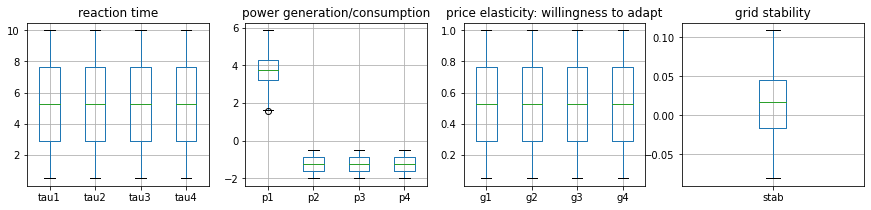

In [30]:
# Plotting box plots for different feature groups
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(15, 3))      # subplots function gives figure with array of axes for subplots

for axs_index, feature_group in enumerate(['tau', 'p', 'g']):
  df.boxplot(column = [feature_group + str(i+1) for i in range(4)], ax = axs[axs_index])    # list comprehension for xticks

df.boxplot(column='stab', ax=axs[3])

for axs_index, title in enumerate(['reaction time', 'power generation/consumption', 'price elasticity: willingness to adapt', 'grid stability']):
  axs[axs_index].set(title=title);

In [31]:
df['stabf'].value_counts()                            # Check if data is balanced

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [32]:
# Rename columns to user friendly names
# df.columns=['delay1', 'delay2', 'delay3', 'delay4', 'power1', 'power2', 'power3', 'power4', 'adapt1', 'adapt2', 'adapt3', 'adapt4']
# df.rename(columns={'tau':'delay', 'p':'power', 'g':'adapt'}, inplace = True)

In [33]:
df.columns = (df.columns.str.replace('tau', 'delay')
                .str.replace('p', 'power')
                .str.replace('g', 'adapt'))

In [34]:
df

,delay1,delay2,delay3,delay4,power1,power2,power3,power4,adapt1,adapt2,adapt3,adapt4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                                                             # Used for binary encoding, unstable = 1 and stable = 0

In [36]:
df['stabf'] = le.fit_transform(df['stabf'])

In [37]:
df

,delay1,delay2,delay3,delay4,power1,power2,power3,power4,adapt1,adapt2,adapt3,adapt4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,1


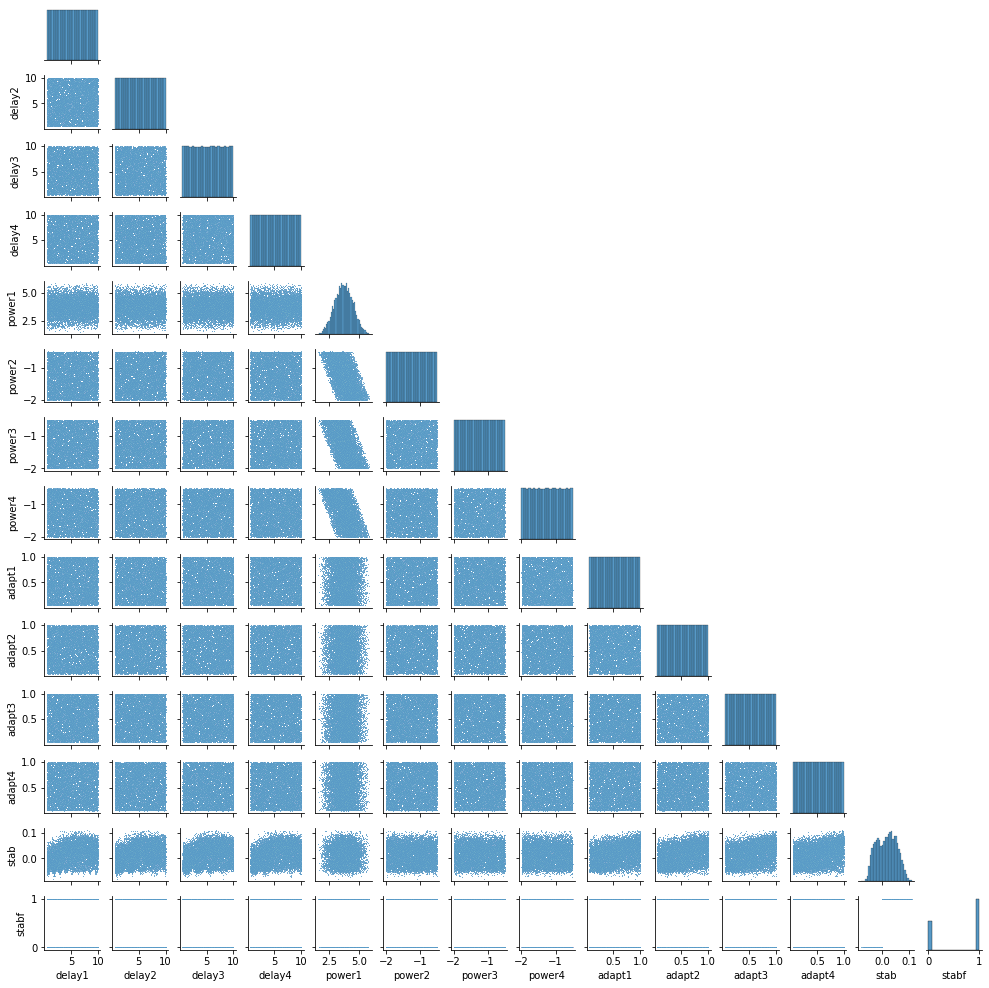

In [38]:
# PairGrid just returns a grid of frames to make the plot
# aspect * height gives width for each of the plots
grid = sns.PairGrid(df, diag_sharey = False, corner = True, height = 1, aspect = 1) # to avoid redundancy(duplicacy) that was in case of normal pairgrid, use 'corner = True'
grid.map_lower(sns.scatterplot, s=1)                          # plot scatter plot on lower part of diagonal
grid.map_diag(sns.histplot)                                   # plot histogram along the diagonal
print(grid)

In [39]:
df.corr()

,delay1,delay2,delay3,delay4,power1,power2,power3,power4,adapt1,adapt2,adapt3,adapt4,stab,stabf
delay1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761,0.234898
delay2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975,0.246280
delay3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700,0.237492
delay4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576,0.239375
power1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278,0.009938
power2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255,0.006173
power3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321,-0.000649
power4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786,-0.022785
adapt1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774,0.197664
adapt2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601,0.217341


In [40]:
df

,delay1,delay2,delay3,delay4,power1,power2,power3,power4,adapt1,adapt2,adapt3,adapt4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,1


In [41]:
# Correlation is extent to which variables are linearly related
# 1 => Perfect positive correlation
# 0 => No correlation
# -1 => Perfect negative correlation

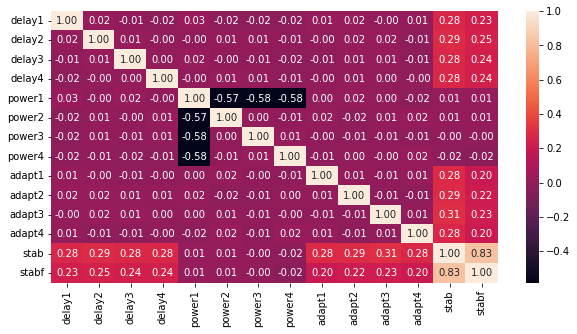

In [42]:
# plotting heatmaps to understand correlations (Pearson Correlation)
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), fmt = '.2f', annot=True)

In [43]:
# We can infer that stab and stabf are more correlated
# Stability and delay is much less
# Stability and adapt is also quite less
# power1(Producer) and power2,3,4(Consumers) are negatively correlated
# There is no correlation between adapt and delay

In [44]:
# As stab and stabf have more correlation, we shall drop stab

In [45]:
df.drop(columns=['stab'], inplace=True)

In [46]:
df

,delay1,delay2,delay3,delay4,power1,power2,power3,power4,adapt1,adapt2,adapt3,adapt4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,1


In [47]:
features = df.drop(columns=['stabf'], axis = 1).columns       # 'axis = 1' implies columns, 'axis = 0' indicated indices

In [48]:
features

Index(['delay1', 'delay2', 'delay3', 'delay4', 'power1', 'power2', 'power3',
       'power4', 'adapt1', 'adapt2', 'adapt3', 'adapt4'],
      dtype='object')

In [49]:
type(features)

pandas.core.indexes.base.Index

In [50]:
len(features)

12

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
(pd.DataFrame({
    "variables": df[features].columns,
    "VIF": [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
}).rename({"variables": ""}, axis = 1).set_index("").transpose()
)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,delay1,delay2,delay3,delay4,power1,power2,power3,power4,adapt1,adapt2,adapt3,adapt4
VIF,4.411883,4.373177,4.387577,4.342155,inf,inf,inf,inf,4.358228,4.39541,4.3677,4.321428


In [52]:
(df['power1'] == -(df['power2']+df['power3']+df['power4'])).value_counts()

False    7123
True     2877
dtype: int64

In [53]:
df['stabf'].value_counts()

1    6380
0    3620
Name: stabf, dtype: int64

In [54]:
# Both pearson correlation and variance inflation factor suggests that power columns are collinear

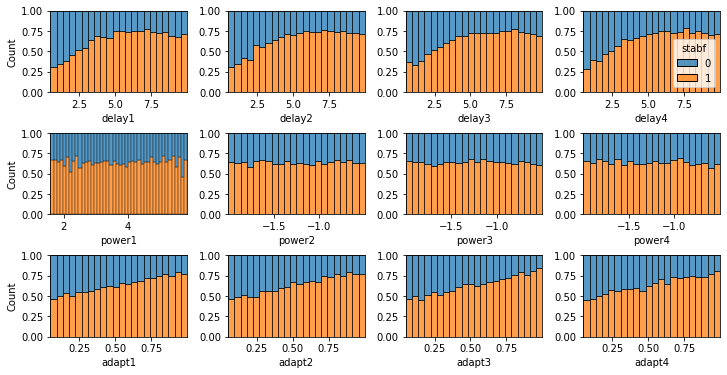

In [55]:
fig, axs = plt.subplots(nrows = 3, ncols = 4, figsize = (12, 6))
plt.subplots_adjust(wspace = 0.3, hspace=0.5)   # width of the padding between subplots, as a fraction of the average Axes width
# height of the padding between subplots, as a fraction of the average Axes height

for rindex, feature_group in enumerate(['delay', 'power', 'adapt']):
  for cindex in range(4):
    show_legend = True if(rindex == 0) & (cindex == 3) else False               # one line if else condition
    # show legend only for top right corner
    sns.histplot(df, x = feature_group + str(cindex+1), hue = "stabf", multiple = "fill", legend = show_legend, ax = axs[rindex, cindex])

    if cindex>0:
      axs[rindex, cindex].set_ylabel("")                                        # removing off ylabel

In [56]:
# increased with reaction delay (of both producers and consumers) until roughly 5 seconds, after which the share of unstable events was relatively unaffected by further increases in delay times
# increased linearly with willingness to adapt (of both producers and consumers) i.e getting stable(0)
# still seemed uncorrelated with amount of power produced or consumed

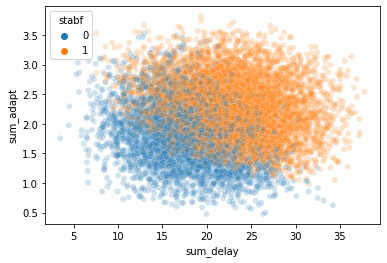

In [57]:
df.assign(sum_delay = lambda x: df['delay1'] + df['delay2'] + df['delay3'] + df['delay4'], 
           sum_adapt = lambda x: df['adapt1'] + df['adapt2'] + df['adapt3'] + df['adapt4']).pipe((sns.scatterplot, "data"), x = "sum_delay", y = "sum_adapt", hue = "stabf", alpha = 0.2)
# instead you can replace df['cols'] with x['cols']
# hue is for color selection, as it is binary, examining stabf 2 colors would be chosen for representation

In [58]:
# assign function assigns new columns to the dataframe by creating a copy of it
# pipe() is used to create a pipe, it passes the info of one process to the other
# It offers One Way communication. And here the info is held by the system until it is read by recieving process.
# Here lambda is taking entire dataframe as arguement

In [59]:
df

,delay1,delay2,delay3,delay4,power1,power2,power3,power4,adapt1,adapt2,adapt3,adapt4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,1


3. Build models

In [60]:
# include feature scaling in pipeline to avoid data leakage but allow for easy adjustments when optimising
# Check for overfitting 
# Split the data 20% as test set

In [61]:
# Performs Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df.drop(columns = ['stabf'], axis = 1))                    # fit_Transform of standard scaler returns array of scaled values

In [62]:
df_scaled

array([[-0.83537431, -0.79131661,  1.14170354, ...,  1.22001311,
         1.32162751,  1.57902607],
       [ 1.47829663, -0.12670487, -0.80311147, ...,  1.23035426,
         0.13542358,  0.93625569],
       [ 1.35709296,  1.31213982, -0.80349871, ...,  0.88129868,
         1.14659574, -1.51380226],
       ...,
       [-1.05234609, -0.87804866,  1.28587062, ...,  1.68284371,
        -1.37001303, -1.38205402],
       [ 1.59768553, -0.45784646, -0.90902909, ...,  0.2281105 ,
         1.32772953,  1.06982944],
       [ 0.4669346 ,  0.55855544, -0.32829064, ..., -0.0713212 ,
        -0.53325125,  1.52285961]])

In [63]:
type(df_scaled)

numpy.ndarray

In [64]:
df_scaled = pd.DataFrame(df_scaled, columns = df.drop(columns=['stabf']).columns)

In [65]:
df_scaled

,delay1,delay2,delay3,delay4,power1,power2,power3,power4,adapt1,adapt2,adapt3,adapt4
0,-0.835374,-0.791317,1.141704,1.652103,0.017397,1.079405,-0.017078,-1.092545,0.457467,1.220013,1.321628,1.579026
1,1.478297,-0.126705,-0.803111,-1.415043,1.752124,-1.593619,-1.438158,-0.011575,-0.406791,1.230354,0.135424,0.936256
2,1.357093,1.312140,-0.803499,-1.471504,-0.458492,0.098253,-0.062840,0.760963,-1.319852,0.881299,1.146596,-1.513802
3,-1.653138,0.882289,-0.278354,-1.060901,0.284250,0.513904,-1.591046,0.583414,-0.287304,1.647250,1.474543,-0.591750
4,-0.771543,0.860108,-0.111670,1.680114,-0.298075,0.287450,-1.376343,1.606636,0.992226,-0.253610,0.481133,1.079063
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.845823,1.545219,-1.047793,0.341961,-0.540582,1.367041,-0.459815,0.031739,0.279714,0.928533,1.052035,0.304055
9996,-0.677397,-1.449518,-0.836875,0.599749,0.797094,-0.955307,0.687190,-1.116396,-0.083579,0.154031,-0.871936,-0.579344
9997,-1.052346,-0.878049,1.285871,-1.546478,0.731231,-0.301880,0.706942,-1.675175,-0.135508,1.682844,-1.370013,-1.382054
9998,1.597686,-0.457846,-0.909029,0.937621,-1.642346,0.655109,1.385835,0.811729,-0.582529,0.228110,1.327730,1.069829


In [66]:
df_scaled['stabf'] = df['stabf']

In [67]:
df_scaled

,delay1,delay2,delay3,delay4,power1,power2,power3,power4,adapt1,adapt2,adapt3,adapt4,stabf
0,-0.835374,-0.791317,1.141704,1.652103,0.017397,1.079405,-0.017078,-1.092545,0.457467,1.220013,1.321628,1.579026,1
1,1.478297,-0.126705,-0.803111,-1.415043,1.752124,-1.593619,-1.438158,-0.011575,-0.406791,1.230354,0.135424,0.936256,0
2,1.357093,1.312140,-0.803499,-1.471504,-0.458492,0.098253,-0.062840,0.760963,-1.319852,0.881299,1.146596,-1.513802,1
3,-1.653138,0.882289,-0.278354,-1.060901,0.284250,0.513904,-1.591046,0.583414,-0.287304,1.647250,1.474543,-0.591750,1
4,-0.771543,0.860108,-0.111670,1.680114,-0.298075,0.287450,-1.376343,1.606636,0.992226,-0.253610,0.481133,1.079063,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.845823,1.545219,-1.047793,0.341961,-0.540582,1.367041,-0.459815,0.031739,0.279714,0.928533,1.052035,0.304055,1
9996,-0.677397,-1.449518,-0.836875,0.599749,0.797094,-0.955307,0.687190,-1.116396,-0.083579,0.154031,-0.871936,-0.579344,0
9997,-1.052346,-0.878049,1.285871,-1.546478,0.731231,-0.301880,0.706942,-1.675175,-0.135508,1.682844,-1.370013,-1.382054,0
9998,1.597686,-0.457846,-0.909029,0.937621,-1.642346,0.655109,1.385835,0.811729,-0.582529,0.228110,1.327730,1.069829,1


In [68]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop(['stabf'], axis = 1)
y = df_scaled[['stabf']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y['stabf'], random_state = 1)
# stratify parameter in train_test_split is that train set, test set should have same proportion of class labels as in dataset

assert all(y_train.value_counts(normalize = True) == y_test.value_counts(normalize = True)), "inconsistent class share after split"

In [69]:
# there are 2 versions of data with and without consumer power

In [70]:
X_train

,delay1,delay2,delay3,delay4,power1,power2,power3,power4,adapt1,adapt2,adapt3,adapt4
8528,1.231790,-0.507196,0.942990,0.624389,0.829645,0.101434,-0.875443,-0.667042,-0.308100,1.661491,-1.061106,-0.969182
6732,0.888107,-1.009953,-0.168365,1.095897,0.093486,1.564294,-0.190881,-1.535794,-0.056297,1.555064,1.681005,-0.145054
6499,0.157448,0.179203,-0.515072,0.817504,-0.274398,-1.024309,0.387777,1.113148,-0.522013,-1.436400,-0.832924,1.684565
3504,1.333142,-0.325942,-0.424192,-1.405201,1.659840,0.039978,-1.526150,-1.396885,-1.391337,0.114383,1.475497,0.590191
7970,-0.548610,-0.410793,1.420281,1.365292,1.101931,-1.680633,-1.030423,0.797057,0.314025,-1.429492,-0.905028,0.266117
...,...,...,...,...,...,...,...,...,...,...,...,...
9872,-0.405811,0.612892,0.597654,0.461388,1.161398,-0.671875,-1.443600,0.098185,-0.657778,-0.513793,-0.961147,1.642457
6908,-0.322045,-1.203144,1.445825,0.859117,0.482416,0.381851,-0.645459,-0.574323,0.206479,-1.056505,-1.380934,0.174861
8284,-1.636264,-0.294405,-0.477148,1.083747,-0.336914,1.282613,-0.176221,-0.521189,0.187205,-1.317998,-1.162676,-1.078538
2397,0.585397,0.255399,-1.238318,1.472414,-0.762450,-1.097043,0.784771,1.636609,-1.539740,0.601287,0.674164,1.401015


In [71]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from xgboost import XGBClassifier

# classifiers
rfc = RandomForestClassifier(random_state = 1)
etc = ExtraTreesClassifier(n_estimators = 100, random_state = 1)
lgb = LGBMClassifier(random_state = 1)
xgbc = XGBClassifier()

# cross-validation splitters
skf = StratifiedKFold(n_splits = 10, random_state = 1,shuffle = True)        # for classifier split
kf = KFold(random_state = 1, shuffle = True)                                 # for regressor split

In [72]:
print("For Classifiers: ", skf)

For Classifiers:  StratifiedKFold(n_splits=10, random_state=1, shuffle=True)


In [73]:
y_train

,stabf
8528,1
6732,1
6499,1
3504,1
7970,1
...,...
9872,1
6908,0
8284,0
2397,1


In [74]:
y_train.shape

(8000, 1)

In [75]:
y_train = np.array(y_train)

In [76]:
type(y_train)

numpy.ndarray

In [77]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 1)

Predicting on Cross-Validation Set

In [78]:
# Predicting on CV Set
rfc.fit(X_train, y_train)
y_pred_val = rfc.predict(X_val)

<ipython-input-78-df3fd06b2172>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [79]:
y_val

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [80]:
y_pred_val

array([1, 1, 0, ..., 1, 1, 0])

In [81]:
from sklearn import metrics 
print("Accuracy on Validation Set(RandomForestClassifier) is: ", metrics.accuracy_score(y_val, y_pred_val)*100, "%")

Accuracy on Validation Set(RandomForestClassifier) is:  100.0 %


In [82]:
# Cross Val Score Accuracy using RandomForestClassifier upon StratifiedKFold split
from sklearn.model_selection import cross_val_score
from numpy import mean

scores = cross_val_score(rfc, X_train, y_train, scoring = "accuracy", cv = skf, n_jobs = -1)
print("Accuracy of random trees model upon StratifiedKFold cross-validation split is: ", round(mean(scores)*100, 2), "%")

Accuracy of random trees model upon StratifiedKFold cross-validation split is:  91.86 %


In [83]:
# Predicting on CV Set
etc.fit(X_train, y_train)
y_pred_val1 = etc.predict(X_val)

<ipython-input-83-6dc9b14497b9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etc.fit(X_train, y_train)


In [84]:
y_val

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [85]:
y_pred_val1

array([1, 1, 0, ..., 1, 1, 0])

In [86]:
from sklearn import metrics
print("Accuracy on Validation Set(ExtraTreesClassifier) is:", metrics.accuracy_score(y_val, y_pred_val1)*100, "%")

Accuracy on Validation Set(ExtraTreesClassifier) is: 100.0 %


In [87]:
# Cross Val Score Accuracy using ExtraTreesClassifier upon StratifiedKFold split
from sklearn.model_selection import cross_val_score
from numpy import mean

scores1 = cross_val_score(etc, X_train, y_train, scoring = "accuracy", cv = skf, n_jobs = -1)
print("Accuracy of ExtraTreesClassifier upon StratifiedKFold cross-validation split is: ", round(mean(scores1)*100, 2), "%")

Accuracy of ExtraTreesClassifier upon StratifiedKFold cross-validation split is:  92.49 %


In [88]:
# Predicting on CV Set
lgb.fit(X_train, y_train)
y_pred_val2 = lgb.predict(X_val)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
y_val

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [90]:
y_pred_val2

array([1, 1, 0, ..., 1, 1, 0])

In [91]:
from sklearn import metrics
print("Accuracy on Validation Set(LightGBMClassifier) is:", round(metrics.accuracy_score(y_val, y_pred_val2)*100, 2), "%")

Accuracy on Validation Set(LightGBMClassifier) is: 99.83 %


In [92]:
# Cross Val Score Accuracy using LightGBMClassifier upon StratifiedKFold split
from sklearn.model_selection import cross_val_score
from numpy import mean

scores2 = cross_val_score(lgb, X_train, y_train, scoring = "accuracy", cv = skf, n_jobs = -1)
print("Accuracy of LightGBMClassifier upon StratifiedKFold cross-validation split:", round(mean(scores2)*100, 2), "%")

Accuracy of LightGBMClassifier upon StratifiedKFold cross-validation split: 94.1 %


Predicting on Test Sets

In [93]:
# Predicting on test set using RandomForestClassifier
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

<ipython-input-93-6165129cd85f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [94]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [95]:
y_test

,stabf
5356,0
4132,0
1723,0
1779,1
2836,1
...,...
1121,0
5609,1
2501,0
4683,0


In [96]:
print("Accuracy on test set using RandomForestClassifier is: ", metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy on test set using RandomForestClassifier is:  91.75 %


In [97]:
# Predicting on test set using ExtraTreesClassifier
etc.fit(X_train, y_train)
y_pred1 = etc.predict(X_test)

<ipython-input-97-fb9ebbfe4d2e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etc.fit(X_train, y_train)


In [98]:
y_pred1

array([0, 0, 1, ..., 0, 0, 1])

In [99]:
y_test

,stabf
5356,0
4132,0
1723,0
1779,1
2836,1
...,...
1121,0
5609,1
2501,0
4683,0


In [100]:
print("Accuracy on test set using ExtraTreesClassifier is:", metrics.accuracy_score(y_test, y_pred1)*100, "%")

Accuracy on test set using ExtraTreesClassifier is: 92.75 %


In [101]:
# Predicting on test set using LightGBMClassifier
lgb.fit(X_train, y_train)
y_pred2 = lgb.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
y_pred2

array([0, 0, 0, ..., 0, 0, 1])

In [103]:
y_test

,stabf
5356,0
4132,0
1723,0
1779,1
2836,1
...,...
1121,0
5609,1
2501,0
4683,0


In [104]:
print("Accuracy on test set using LightGBMClassifier is:", metrics.accuracy_score(y_test, y_pred2)*100, "%")

Accuracy on test set using LightGBMClassifier is: 94.5 %


In [105]:
# Checking with Out-Of-Bag(OOB) scores in RandomForestClassifier
# Calculate scores using only the trees that didn't train on particular samples
rfc.fit(X_train, y_train)
rfc_oob = RandomForestClassifier(oob_score = True, random_state = 1)
rfc_oob.fit(X_train, y_train)

pd.DataFrame({"Classfier": [rfc.score(X_train, y_train), rfc_oob.oob_score, rfc.score(X_val, y_val)],} , index = ['RFC train score', 'RFC OOB score', 'RFC validation score']).style.format("{:.3f}").set_caption("Baseline Performances")

<ipython-input-105-c055f230b636>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)
<ipython-input-105-c055f230b636>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_oob.fit(X_train, y_train)


,Classfier
RFC train score,1.000
RFC OOB score,1.000
RFC validation score,1.000


In [106]:
import xgboost as xgb

In [107]:
xgbc = xgb.XGBClassifier()

In [108]:
xgbc.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [109]:
# Predicting on CV Set
y_pred_val3 = xgbc.predict(X_val)

In [110]:
y_val

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [111]:
y_pred_val3

array([1, 1, 0, ..., 1, 1, 0])

In [112]:
# Predicting on CV Set
from sklearn import metrics
print("Accuracy on Validation Set(XGBoostClassifier) is:", round(metrics.accuracy_score(y_val, y_pred_val3)*100, 2), "%")

Accuracy on Validation Set(XGBoostClassifier) is: 95.29 %


In [113]:
# Cross Val Score Accuracy using XGBoostClassifier upon StatifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean

scores3 = cross_val_score(xgbc, X_train, y_train, cv = skf, scoring = "accuracy", n_jobs = -1)
print("Accuracy of XGBoostClassifier upon StratifiedKFold cross-validation split:", round(mean(scores3), 2)*100, "%")

Accuracy of XGBoostClassifier upon StratifiedKFold cross-validation split: 92.0 %


In [114]:
# Predicting on test set using XGBoostClassifier
xgbc.fit(X_train, y_train)
y_pred3 = xgbc.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
y_test

,stabf
5356,0
4132,0
1723,0
1779,1
2836,1
...,...
1121,0
5609,1
2501,0
4683,0


In [116]:
y_pred3

array([0, 0, 0, ..., 0, 0, 1])

In [117]:
print("Accuracy on test set using XGBoostClassifier is:", metrics.accuracy_score(y_test, y_pred3)*100, "%")

Accuracy on test set using XGBoostClassifier is: 92.45 %


In [119]:
lgb.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(random_state=1)

In [120]:
print(lgb.predict(X_test))

[0 0 0 ... 0 0 1]


In [121]:
pickle.dump(lgb, open("grid.pkl", "wb"))